In [7]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import sys
import random

from itertools import product

from Data_Loading import *
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import PolynomialFeatures

In [8]:
main_df = pd.read_csv('Banco de Dados/atributos/atributos_main.csv', index_col=0)
main_df['filepath'] = main_df['database']+'/'+main_df['filename']
main_df = main_df.set_index(['database', 'filename'])
main_df['bpm'] = main_df['bpm'].apply(lambda bpm: round(bpm*2)/2)
main_df

v_eta_A5  v_eta_D5  v_eta_D4  v_eta_D3  v_eta_D2  \
database  filename                                                              
acm_mirum 10118334.clip.mp3  2.833333  2.200000  3.181818  2.354839  4.593750   
          10258351.clip.mp3  2.266667  3.200000  2.615385  3.227273  3.617284   
          10270809.clip.mp3  2.285714  2.266667  2.692308  2.147059  3.945946   
          10332517.clip.mp3  2.666667  2.666667  2.500000  2.920000  2.940000   
          10348303.clip.mp3  3.090909  2.266667  4.125000  3.041667  3.945946   
...                               ...       ...       ...       ...       ...   
banco1    95.wav             3.750000  2.538462  3.000000  3.736842  3.918919   
          96.wav             2.833333  2.428571  2.571429  2.117647  4.264706   
          97.wav             2.428571  2.125000  2.428571  2.117647  4.235294   
          98.wav             3.000000  2.538462  2.916667  3.476190  4.424242   
          99.wav             3.500000  2.428571  2.916667  3.136364  3.106383   

                             v_eta_D1  v_sigma_A5  v_sigma_D5  v_sigma_D4  \
database  filename                                                          
acm_mirum 10118334.clip.mp3  9.187500    1.213352    0.400000    0.574960   
          10258351.clip.mp3  6.444444    0.442217    0.748331    0.624926   
          10270809.clip.mp3  7.891892    0.699854    0.442217    0.461538   
          10332517.clip.mp3  3.959459    0.471405    0.471405    0.731925   
          10348303.clip.mp3  5.192982    0.995859    0.442217    1.964529   
...                               ...         ...         ...         ...   
banco1    95.wav             5.745098    0.433013    0.745797    0.852803   
          96.wav             8.500000    1.067187    0.494872    0.622700   
          97.wav             6.125000    0.728431    0.330719    0.728431   
          98.wav             8.314286    0.632456    1.082404    0.862007   
          99.wav             5.214286    0.500000    0.728431    0.953794   

                             v_sigma_D3  ...   v_sd_D2   v_sd_D1   v_sf_A5  \
database  filename                       ...                                 
acm_mirum 10118334.clip.mp3    0.649982  ... -0.023721 -0.007043  0.721463   
          10258351.clip.mp3    0.419070  ... -0.040796 -0.040910  0.720558   
          10270809.clip.mp3    0.493031  ... -0.062429 -0.056861  0.716342   
          10332517.clip.mp3    0.271293  ... -0.058653 -0.053484  0.650508   
          10348303.clip.mp3    1.059841  ... -0.040350 -0.025611  0.573808   
...                                 ...  ...       ...       ...       ...   
banco1    95.wav               0.440347  ... -0.054363 -0.037688  0.519931   
          96.wav               0.322190  ... -0.062304 -0.055434  0.683548   
          97.wav               0.322190  ... -0.032933 -0.038682  0.693360   
          98.wav               1.219643  ... -0.033274 -0.017450  0.705853   
          99.wav               0.919261  ... -0.072486 -0.047873  0.698925   

                              v_sf_D5   v_sf_D4   v_sf_D3   v_sf_D2   v_sf_D1  \
database  filename                                                              
acm_mirum 10118334.clip.mp3  0.690003  0.710161  0.501041  0.604924  0.308860   
          10258351.clip.mp3  0.762754  0.526791  0.331555  0.290153  0.160497   
          10270809.clip.mp3  0.614350  0.502162  0.446977  0.412124  0.292314   
          10332517.clip.mp3  0.615221  0.558058  0.446767  0.445115  0.247787   
          10348303.clip.mp3  0.692712  0.567320  0.689657  0.614103  0.408099   
...                               ...       ...       ...       ...       ...   
banco1    95.wav             0.647449  0.496156  0.437015  0.530072  0.344177   
          96.wav             0.706678  0.632906  0.421532  0.384137  0.314319   
          97.wav             0.691660  0.717247  0.418132  0.331272  0.216553   
          98.wav             0.734266  0.565840  0.516848  0.410616

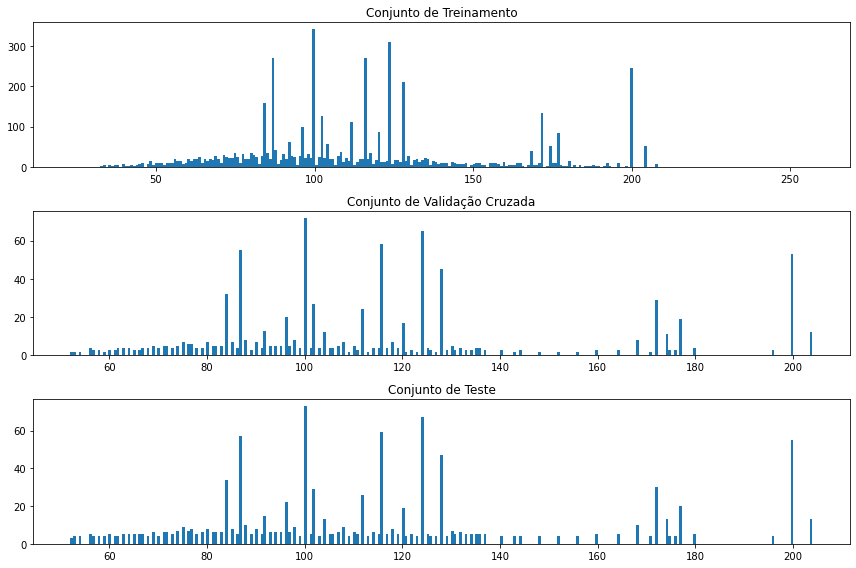

In [17]:
escolha_balanceamento = input("Digite: \n 0 - Train/Test aleatório \n 1 - Train/CV/Test balanceado sem shuffle \n _ - Train/CV/Test balanceado sem shuffle")

if escolha_balanceamento == '0':

    X = main_df.loc[:, :'v_sd_D1']
    y = main_df.loc[:, ['bpm']]
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    y_train = y_train.values.reshape(-1,)
    y_test = y_test.values.reshape(-1,)

    plt.subplot(2,1,1)
    plt.hist(y_train, bins = 273)
    plt.subplot(2,1,2)
    plt.hist(y_test, bins = 273)
    plt.show()

else:
    dict = {}
    if escolha_balanceamento ==  '1':
        pass
    else:
        main_df = main_df.sample(frac=1)


    for bpm in main_df['bpm'].unique():
        dict[bpm] = main_df[main_df['bpm'] == bpm]

    train = pd.DataFrame()
    cv = pd.DataFrame()
    test = pd.DataFrame()


    for label, bpm_list in dict.items():
        if(len(bpm_list)<10):
            train = pd.concat([train, bpm_list], axis=0)
        else:
            train_size = int(0.7*len(bpm_list))
            cv_size = int(0.15*len(bpm_list))
            test_size = int(0.15*len(bpm_list))
            
            train_set = bpm_list.iloc[:train_size]
            cv_set = bpm_list.iloc[train_size-1:train_size+cv_size]
            test_set = bpm_list.iloc[train_size+cv_size-1:]
            
            train = pd.concat([train, train_set], axis=0)
            cv = pd.concat([cv, cv_set], axis=0)
            test = pd.concat([test, test_set], axis=0)
            
            
    X_train = train.loc[:, :'v_sd_D1']
    y_train = train.loc[:, ['bpm']]

    X_cv = cv.loc[:, :'v_sd_D1']
    y_cv = cv.loc[:, ['bpm']]

    X_test = test.loc[:, :'v_sd_D1']
    y_test = test.loc[:, ['bpm']]


    y_train = y_train.values.reshape(-1,)
    y_cv = y_cv.values.reshape(-1,)
    y_test = y_test.values.reshape(-1,)

    fig, ax = plt.subplots(3,1)
    fig.set_size_inches(12, 8)

    
    ax[0].set_title('Conjunto de Treinamento')
    ax[0].hist(y_train, bins = 273)

    ax[1].set_title('Conjunto de Validação Cruzada')
    ax[1].hist(y_cv, bins = 273)
    
    ax[2].set_title('Conjunto de Teste')
    ax[2].hist(y_test, bins = 273)

    fig.tight_layout()
    plt.show()


In [3]:
sequencial_dict = {}

for bpm in main_df['bpm'].unique():
    sequencial_dict[bpm] = main_df[main_df['bpm'] == bpm]



random_df = main_df.sample(frac=1)
rnd_dict = {}

for bpm in random_df['bpm'].unique():
    rnd_dict[bpm] = random_df[random_df['bpm'] == bpm]

   

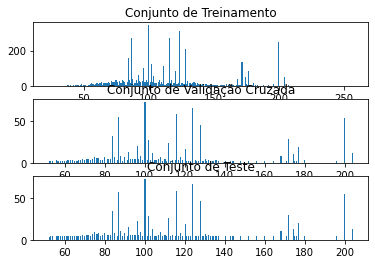

In [5]:
dicio = rnd_dict #Choose dictionary between random or not

train = pd.DataFrame()
cv = pd.DataFrame()
test = pd.DataFrame()


for label, bpm_list in dicio.items():
    if(len(bpm_list)<10):
        train = pd.concat([train, bpm_list], axis=0)
    else:
        train_size = int(0.7*len(bpm_list))
        cv_size = int(0.15*len(bpm_list))
        test_size = int(0.15*len(bpm_list))
        
        train_set = bpm_list.iloc[:train_size]
        cv_set = bpm_list.iloc[train_size-1:train_size+cv_size]
        test_set = bpm_list.iloc[train_size+cv_size-1:]
        
        train = pd.concat([train, train_set], axis=0)
        cv = pd.concat([cv, cv_set], axis=0)
        test = pd.concat([test, test_set], axis=0)
        
        
X_train = train.loc[:, :'v_sd_D1']
y_train = train.loc[:, ['bpm']]

X_cv = cv.loc[:, :'v_sd_D1']
y_cv = cv.loc[:, ['bpm']]

X_test = test.loc[:, :'v_sd_D1']
y_test = test.loc[:, ['bpm']]


y_train = y_train.values.reshape(-1,)
y_cv = y_cv.values.reshape(-1,)
y_test = y_test.values.reshape(-1,)


plt.subplot(3,1,1)
plt.title('Conjunto de Treinamento')
plt.hist(y_train, bins = 273)
plt.subplot(3,1,2)
plt.title('Conjunto de Validação Cruzada')
plt.hist(y_cv, bins = 273)
plt.subplot(3,1,3)
plt.title('Conjunto de Teste')
plt.hist(y_test, bins = 273)
plt.show()

In [6]:
plt.hist(y_train, bins = 273)
plt.title('Conjunto de Treinamento')
plt.savefig('Distribuicao_treinamento.png')
plt.clf()
plt.hist(y_cv, bins = 273)
plt.title('Conjunto de Validação Cruzada')
plt.savefig('Distribuicao_validacao.png')
plt.clf()
plt.hist(y_test, bins = 273)
plt.title('Conjunto de Teste')
plt.savefig('Distribuicao_teste.png')
plt.clf()



<Figure size 432x288 with 0 Axes>

In [8]:
X_train_std = StandardScaler().fit_transform(X_train)
X_cv_std = StandardScaler().fit_transform(X_cv)
X_test_std = StandardScaler().fit_transform(X_test)


results_df = pd.DataFrame({"Espaço":[],
                           "Train_loss_array":[], "Train_loss":[],
                           "CV_loss_array":[], "CV_loss":[],
                           "Test_loss_array":[], "Test_loss":[],
                           "num_iter":[], "time_elapsed":[]})



#alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
#learning_rates = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
#layer_sizes = [(3,), (3,3), (5,), (5,5), (7,), (7,7), (9,), (9,9)]

alphas = [1, 3, 10, 30, 100, 300]
learning_rates = [0.0003, 0.001, 0.003, 0.01, 0.03]
layer_sizes = [(5,), (5,5), (7,), (7,7), (9,), (9,9)]

iter_divisor = 24

params_space = list(product(alphas, learning_rates, layer_sizes))
params_num = len(params_space)
cur_param = 0

In [9]:
for space_i, space in enumerate(params_space):
    start = time.time()
    mlp = MLPRegressor(alpha = space[0], learning_rate_init = space[1], hidden_layer_sizes = space[2], warm_start = True)
    train_error = []
    cv_error = []
    test_error = []
    
    times_down = 0
    times_up = 0
    max_iter = int(iter_divisor/space[1])
    for i in range(max_iter):
        mlp.partial_fit(X_train_std, y_train)
        train_loss = mean_squared_error(mlp.predict(X_train_std), y_train)
        
        if i>0:
            if(train_error[-1] - train_loss)<0:
                times_up =  times_up+1
                if times_up >=5:
                    sys.stdout.flush()
                    print(f'Espaço de Parâmetros {space_i}: {space} - Treinamento encerrado por falta de evolução: {i} iterações | erro={round(train_loss,3)}!')
                    break
            elif (train_error[-1] - train_loss)<0.001:
                times_down  = times_down + 1
                if times_down >=5:
                    sys.stdout.flush()
                    print(f'Espaço de Parâmetros {space_i}: {space} - Treinamento encerrado por evolução aceitável: {i} iterações | erro={round(train_loss,3)}!')
                    break                
            else:
                times_down=0
                times_up=0
                    
        
        train_error.append(train_loss)
        cv_error.append(mean_squared_error(mlp.predict(X_cv_std), y_cv))
        test_error.append(mean_squared_error(mlp.predict(X_test_std), y_test))
        
        print(f'Espaço de Parâmetros {space_i} {space} - Iterações realizadas: {i}/{max_iter} - Train_loss: {train_loss}', end='\r')
        
        if i==max_iter-1:
            sys.stdout.flush()
            print(f'Espaço de Parâmetros {space_i}: {space} - Treinamento encerrado por máximo de iterações: {max_iter}!')
    
    end = time.time()
    
    
    this_dict = {"Espaço":[], "Layers":[], "Train_loss_array":[], "CV_loss_array":[], "Test_loss_array":[]}
    this_dict["Espaço"].append(space)
    this_dict["Alpha"] = space[0]
    this_dict["Learning Rate"] = space[1]
    this_dict["Layers"].append(space[2])
    this_dict["Train_loss_array"].append(train_error)
    this_dict["Train_loss"] = float(train_error[-1])
    this_dict["CV_loss_array"].append(cv_error)
    this_dict["CV_loss"] = float(cv_error[-1])
    this_dict["Test_loss_array"].append(test_error)
    this_dict["Test_loss"] = float(test_error[-1])
    this_dict["num_iter"] = i
    this_dict["time_elapsed"] = (end-start)/60
    
    
    results_df = pd.concat([results_df, pd.DataFrame(this_dict)], ignore_index = True)

Espaço de Parâmetros 0: (1, 0.0003, (5,)) - Treinamento encerrado por falta de evolução: 3711 iterações | erro=1015.887!
Espaço de Parâmetros 1: (1, 0.0003, (5, 5)) - Treinamento encerrado por falta de evolução: 2433 iterações | erro=990.16!
Espaço de Parâmetros 2: (1, 0.0003, (7,)) - Treinamento encerrado por falta de evolução: 4723 iterações | erro=937.695!
Espaço de Parâmetros 3: (1, 0.0003, (7, 7)) - Treinamento encerrado por falta de evolução: 3521 iterações | erro=950.812!
Espaço de Parâmetros 4: (1, 0.0003, (9,)) - Treinamento encerrado por falta de evolução: 3738 iterações | erro=937.184!
Espaço de Parâmetros 5: (1, 0.0003, (9, 9)) - Treinamento encerrado por falta de evolução: 3263 iterações | erro=903.152!
Espaço de Parâmetros 6: (1, 0.001, (5,)) - Treinamento encerrado por falta de evolução: 1491 iterações | erro=986.931!
Espaço de Parâmetros 7: (1, 0.001, (5, 5)) - Treinamento encerrado por falta de evolução: 1237 iterações | erro=991.64!
Espaço de Parâmetros 8: (1, 0.001, 

Espaço de Parâmetros 68: (10, 0.001, (7,)) - Treinamento encerrado por falta de evolução: 1478 iterações | erro=979.777!
Espaço de Parâmetros 69: (10, 0.001, (7, 7)) - Treinamento encerrado por falta de evolução: 550 iterações | erro=1000.067!
Espaço de Parâmetros 70: (10, 0.001, (9,)) - Treinamento encerrado por falta de evolução: 2326 iterações | erro=897.068!
Espaço de Parâmetros 71: (10, 0.001, (9, 9)) - Treinamento encerrado por falta de evolução: 2443 iterações | erro=836.864!
Espaço de Parâmetros 72: (10, 0.003, (5,)) - Treinamento encerrado por falta de evolução: 1875 iterações | erro=937.885!
Espaço de Parâmetros 73: (10, 0.003, (5, 5)) - Treinamento encerrado por falta de evolução: 757 iterações | erro=968.487!
Espaço de Parâmetros 74: (10, 0.003, (7,)) - Treinamento encerrado por falta de evolução: 1418 iterações | erro=949.596!
Espaço de Parâmetros 75: (10, 0.003, (7, 7)) - Treinamento encerrado por falta de evolução: 662 iterações | erro=921.482!
Espaço de Parâmetros 76: (

Espaço de Parâmetros 135: (100, 0.003, (7, 7)) - Treinamento encerrado por falta de evolução: 1518 iterações | erro=959.801!
Espaço de Parâmetros 136: (100, 0.003, (9,)) - Treinamento encerrado por falta de evolução: 921 iterações | erro=1053.727!
Espaço de Parâmetros 137: (100, 0.003, (9, 9)) - Treinamento encerrado por falta de evolução: 133 iterações | erro=1013.553!
Espaço de Parâmetros 138: (100, 0.01, (5,)) - Treinamento encerrado por falta de evolução: 129 iterações | erro=1114.54!
Espaço de Parâmetros 139: (100, 0.01, (5, 5)) - Treinamento encerrado por falta de evolução: 116 iterações | erro=1043.528!
Espaço de Parâmetros 140: (100, 0.01, (7,)) - Treinamento encerrado por falta de evolução: 315 iterações | erro=1112.324!
Espaço de Parâmetros 141: (100, 0.01, (7, 7)) - Treinamento encerrado por falta de evolução: 447 iterações | erro=988.3!
Espaço de Parâmetros 142: (100, 0.01, (9,)) - Treinamento encerrado por falta de evolução: 1405 iterações | erro=1059.364!
Espaço de Parâme

In [10]:
results_df.sort_values(['CV_loss','num_iter'], ascending = [True, False]).to_csv('result_of_180_iterations_v4.csv')



In [15]:
three = pd.read_csv('result_of_180_iterations_v4.csv')
three.sort_values('CV_loss')

,Unnamed: 0,Espaço,Train_loss_array,Train_loss,CV_loss_array,CV_loss,Test_loss_array,Test_loss,num_iter,time_elapsed,Layers,Alpha,Learning Rate
0,149,"(100, 0.03, (9, 9))","[3335.255726689677, 2261.2969228529373, 1762.8...",969.346417,"[3107.2184847217954, 2135.1768632395238, 1608....",951.088358,"[3064.2526826804506, 2178.6086138810333, 1667....",882.463927,799.0,0.214923,"(9, 9)",100.0,0.030
1,106,"(30, 0.003, (9,))","[14503.995579124441, 14170.582429354054, 13712...",880.984473,"[14346.679537751295, 14013.578505740745, 13558...",976.800547,"[14059.766041284058, 13731.176944764751, 13278...",873.898716,1590.0,0.384101,"(9,)",30.0,0.003
2,108,"(30, 0.01, (5,))","[13296.655415944748, 11683.4564575585, 9515.13...",960.304995,"[13122.227314801266, 11494.398360339916, 9312....",977.739482,"[12887.26091286617, 11318.387632771588, 9226.9...",911.517956,1327.0,0.316901,"(5,)",30.0,0.010
3,112,"(30, 0.01, (9,))","[13456.257803685474, 10811.792757198022, 7419....",958.170182,"[13308.43166410642, 10724.805458091512, 7433.1...",981.596972,"[13056.076762952474, 10496.142164742132, 7192....",912.256877,291.0,0.060098,"(9,)",30.0,0.010
4,100,"(30, 0.001, (9,))","[14705.053928623529, 14610.120009732158, 14516...",927.951037,"[14550.663158553001, 14455.57586001819, 14361....",985.464374,"[14263.293411457626, 14169.811494151481, 14077...",903.117524,1148.0,0.275307,"(9,)",30.0,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,174,"(300, 0.03, (5,))","[9700.790480514, 4819.972487103457, 3126.32623...",1220.854735,"[9407.256968114272, 4638.855276023764, 3085.69...",1149.488236,"[9340.446343676238, 4683.797433357061, 3024.68...",1093.217984,799.0,0.149385,"(5,)",300.0,0.030
176,117,"(30, 0.03, (7, 7))","[4827.71526365518, 2376.6095031666537, 1877.68...",1059.512459,"[5216.5075662958225, 2293.491936307927, 1819.7...",1163.900083,"[4612.33791037585, 2258.249905211875, 1783.074...",1055.941586,43.0,0.010674,"(7, 7)",30.0,0.030
177,170,"(300, 0.01, (7,))","[14007.216931607616, 12728.280489582081, 11105...",1220.348193,"[13868.95815614215, 12604.564720564385, 11003....",1164.160577,"[13577.111566051557, 12316.139800399615, 10710...",1094.589455,539.0,0.105203,"(7,)",300.0,0.010
178,178,"(300, 0.03, (9,))","[8275.445991716566, 2924.9812467136126, 2342.8...",1227.061157,"[8095.699883795023, 2843.200069182266, 2261.01...",1169.254543,"[7938.665600593075, 2732.139925103303, 2244.59...",1098.493783,508.0,0.100656,"(9,)",300.0,0.030


In [16]:
alpha = three.groupby('Alpha')['CV_loss'].agg([np.mean, np.min, np.max])
alpha['score'] = (alpha['mean']+alpha['amin'])/2
print('Alpha')
print(alpha.sort_values('score').iloc[0])
print(alpha.sort_values('mean').iloc[0])
print(alpha.sort_values('amin').iloc[0])
print()
print('Layers')
layers = three.groupby('Layers')['CV_loss'].agg([np.mean, np.min, np.max])
layers['score'] = (layers['mean']+layers['amin'])/2
print(layers.sort_values('score').iloc[0])
print(layers.sort_values('mean').iloc[0])
print(layers.sort_values('amin').iloc[0])
print()
print('Learning Rate')
learning_rate = three.groupby('Learning Rate')['CV_loss'].agg([np.mean, np.min, np.max])
learning_rate['score'] = (learning_rate['mean']+learning_rate['amin'])/2
print(learning_rate.sort_values('score').iloc[0])
print(learning_rate.sort_values('mean').iloc[0])
print(learning_rate.sort_values('amin').iloc[0])

Alpha
mean     1053.982170
amin      951.088358
amax     1110.365193
score    1002.535264
Name: 100.0, dtype: float64
mean     1040.200237
amin      976.800547
amax     1163.900083
score    1008.500392
Name: 30.0, dtype: float64
mean     1053.982170
amin      951.088358
amax     1110.365193
score    1002.535264
Name: 100.0, dtype: float64

Layers
mean     1059.590589
amin      951.088358
amax     1124.839931
score    1005.339473
Name: (9, 9), dtype: float64
mean     1047.725713
amin      976.800547
amax     1169.254543
score    1012.263130
Name: (9,), dtype: float64
mean     1059.590589
amin      951.088358
amax     1124.839931
score    1005.339473
Name: (9, 9), dtype: float64

Learning Rate
mean     1052.346830
amin      976.800547
amax     1134.826570
score    1014.573688
Name: 0.003, dtype: float64
mean     1052.346830
amin      976.800547
amax     1134.826570
score    1014.573688
Name: 0.003, dtype: float64
mean     1081.041596
amin      951.088358
amax     1178.763835
score    101

In [ ]:
test_df = main_df.loc[main_df['database']!= 'extended_ballroom']
test_df['database'].unique()

In [ ]:
test_df = main_df.loc[main_df['database']!= 'extended_ballroom']

X = test_df.iloc[:, :66]
y = test_df.iloc[:, [66]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = y_train.values.reshape(-1,)
y_test = y_test.values.reshape(-1,)

plt.subplot(2,1,1)
plt.hist(y_train, bins = 273)
plt.subplot(2,1,2)
plt.hist(y_test, bins = 273)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.4, normalize=True)
lasso.fit(X,y)
print(lasso.coef_)

plt.plot(lasso.coef_, range(len(X.columns)))
plt.yticks(range(len(X.columns)), X.columns, rotation = -15)
plt.show()




#import seaborn as sns
#sns.heatmap(main_df.corr(), square=True, cmap='RdYlGn')

main_df.corr().loc[:, ['bpm']].iloc[:-1].describe()

In [ ]:
mlp = MLPRegressor(max_iter=2000)

norm = StandardScaler()
quantile = QuantileTransformer()

mse = make_scorer(mean_squared_error, greater_is_better=False)
mae = make_scorer(mean_absolute_error,  greater_is_better=False)
r2 = make_scorer(r2_score)

param_grid_mlp = {'model__hidden_layer_sizes': [(5,), (5,5)],
                  'model__learning_rate_init': [0.01, 0.03, 0.1],
                  'model__alpha': [0.003, 0.01, 0.03, 0.1]}


#MLP com Standard Scaler
mlp_scale_pipe= Pipeline([
    ('scale', norm),
    ('model', mlp)
])

mlp_scale = GridSearchCV(estimator = mlp_scale_pipe,
                   param_grid = param_grid_mlp,
                   scoring = {'mse': mse, 'mae': mae, 'r2': r2},
                   refit='r2',
                   cv=10,
                   n_jobs=-1)



#MLP com Quantile Transform
mlp_quant_pipe = Pipeline([
    ('scale', quantile),
    ('model', mlp)
])

mlp_quant = GridSearchCV(estimator = mlp_quant_pipe,
                   param_grid = param_grid_mlp,
                   scoring = {'mse': mse, 'mae': mae, 'r2': r2},
                   refit='r2',
                   cv=10,
                   n_jobs=-1)



In [ ]:
start = time.time()
mlp_scale.fit(X_train, y_train)
end = time.time()

print(f'MLP com Standard Scaler Treinado em {(end-start)/60} minutos')
print()

In [ ]:
start = time.time()
mlp_quant.fit(X_train, y_train)
end = time.time()

print(f'MLP com Quantile Transformer Treinado em {(end-start)/60} minutos')
print()


In [ ]:
print(mlp_scale.best_score_)
print(mlp_scale.best_params_)
print()

print(mlp_quant.best_score_)
print(mlp_quant.best_params_)


In [ ]:
pd.DataFrame(mlp_scale.cv_results_).loc[:,['mean_test_mse', 'rank_test_mse', 'mean_test_mae', 'rank_test_mae', 'mean_test_r2', 'rank_test_r2']]

In [ ]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [ ]:
X_train_poly = PolynomialFeatures(2).fit_transform(X_train)
X_test_poly = PolynomialFeatures(2).fit_transform(X_test)

In [ ]:
train = []
test = []

mlp_alone = MLPRegressor(max_iter = 1000, alpha = 0.3, hidden_layer_sizes = (5,), learning_rate_init = 0.001, warm_start = True)

times = 0

for i in range(5500):
    mlp_alone.partial_fit(X_train_std, y_train)
    train_loss = mean_squared_error(mlp_alone.predict(X_train_std), y_train)
    
    evolution = 0
    if i>0:    
        evolution = train[-1]-train_loss
        if np.abs(evolution) < 0.001:
            times = times + 1
            if times > 10:
                sys.stdout.flush()
                print(f'Treinamento encerrado por evolução aceitável: {evolution} com {i} iterações!')
                break
            else:
                times = 0
            
            
    train.append(train_loss)
    pred = mlp_alone.predict(X_test_std)
    test_loss  = mean_squared_error(pred, y_test)
    test.append(test_loss) 
    print(f'Iterações realizadas: {i} ---- Evolução: {evolution}', end='\r')
    
if i==1199:
    print('Treinamento encerrado por máximo de iterações!')
    i=i+1

In [ ]:
plt.plot(range(i+1), test, label='teste')
plt.plot(range(i+1), train, label='train')
plt.legend()
plt.show()

In [ ]:
mean_squared_error(mlp_alone.predict(X_test_std), y_test)

In [ ]:
bancos = {}
bancos_names = main_df['database'].unique()

for banco in bancos_names:
    banco_i = main_df.loc[main_df['database']==banco]
    bancos[banco] = banco_i.iloc[:, :67]

In [ ]:
bancos_names


In [ ]:
plt.hist(bancos['banco1']['bpm'], bins = 150);
plt.show()

In [ ]:
for banco in bancos:
    